In [147]:
import os
import pandas as pd
import numpy as np
import scipy as sts
import matplotlib.pyplot as plt
import gmaps
import seaborn as sns


In [136]:
world_df= pd.read_csv("../Resources/owid-covid-data.csv")


updated_world_df=world_df.drop(["iso_code", "total_cases", "new_cases","new_deaths_per_million","total_tests","new_tests",
                                "new_tests_smoothed_per_thousand","population","median_age","aged_70_older",
                                "extreme_poverty","diabetes_prevalence","female_smokers","male_smokers",
                               "handwashing_facilities","hospital_beds_per_thousand","life_expectancy",
                               "new_tests_smoothed","new_tests_per_thousand","tests_units","total_deaths",
                               "new_deaths","total_cases_per_million","new_cases_per_million"], axis=1)

updated_world_df=updated_world_dfupdated_world_df=updated_world_df.rename(columns={"location":"Country", "continent":"Continent","date":"Date",
                                                  "total_deaths_per_million":"Total Deaths Per Million",
                                                  "total_tests_per_thousand":"Total Test Per Thousands",
                                                 "population_density":"Population Density","aged_65_older":"Aged 65 or older",
                                                 "gdp_per_capita":"GDP Per Capita","cvd_death_rate":"Covid Death Rate",
                                                 "stringency_index":"Stringency Index"})

#updated_world_df.fillna(0, inplace=True)

updated_world_df.head()

,Continent,Country,Date,Total Deaths Per Million,Total Test Per Thousands,Stringency Index,Population Density,Aged 65 or older,GDP Per Capita,Covid Death Rate
0,Asia,Afghanistan,2019-12-31,0.0,NaN,NaN,54.422,2.581,1803.987,597.029
1,Asia,Afghanistan,2020-01-01,0.0,NaN,0.0,54.422,2.581,1803.987,597.029
2,Asia,Afghanistan,2020-01-02,0.0,NaN,0.0,54.422,2.581,1803.987,597.029
3,Asia,Afghanistan,2020-01-03,0.0,NaN,0.0,54.422,2.581,1803.987,597.029
4,Asia,Afghanistan,2020-01-04,0.0,NaN,0.0,54.422,2.581,1803.987,597.029


In [4]:
#Number Hospital Beds is based on the lastest year per Country

data = pd.read_csv("../Resources/data.csv")

who_df = data.iloc[data.groupby("Country")["Year"].agg(pd.Series.idxmax)]
who_df.reset_index(drop=True).set_index("Country")
who_df=who_df.rename(columns={"Hospital beds (per 10 000 population)":"Hospital Beds (per 10K people)"})
hospital_beds_df=who_df.drop(["Year"], axis=1)

hospital_beds_df.head()

,Country,Hospital Beds (per 10K people)
0,Afghanistan,5
16,Albania,29
29,Algeria,19
31,Angola,8
32,Antigua and Barbuda,38


In [5]:
#Smoking Percentage is based on the lastest year per Country

smokingdata = pd.read_csv("../Resources/smokingdata.csv")

smokingdata_df = smokingdata.iloc[smokingdata.groupby("Country")["Year"].agg(pd.Series.idxmax)]

clean_smoking_data = smokingdata_df.drop(["Estimate of current cigarette smoking prevalence (%).1", "Estimate of current cigarette smoking prevalence (%).2", 
                                       "Estimate of current tobacco smoking prevalence (%)", "Estimate of current tobacco smoking prevalence (%).1", 
                                       "Estimate of current tobacco smoking prevalence (%).2", "Estimate of current tobacco use prevalence (%)", 
                                       "Estimate of current tobacco use prevalence (%).1", "Estimate of current tobacco use prevalence (%).2"], axis=1)

 
clean_smoking_data=clean_smoking_data.rename(columns={"Estimate of current cigarette smoking prevalence (%)":"Smoking Prevalence (%)"})
smoking_data = clean_smoking_data
smoking_prevalence=list(smoking_data["Smoking Prevalence (%)"])
smoking_percentage=[]

for x in smoking_prevalence:
    y=x.split("[")
    smoking_percentage.append(y[0])
    

    
column_values = pd.Series(smoking_percentage)
smoking_data.insert(loc=2, column="Smoking Percetage", value=column_values)
smoking_year_df=smoking_data.drop(["Smoking Prevalence (%)"], axis=1)

smoking_df=smoking_year_df.drop(["Year"], axis=1)

smoking_df.head()

,Country,Smoking Percetage
1,Albania,11.20
7,Algeria,15.20
13,Andorra,21.40
19,Argentina,31.40
25,Armenia,6.00


In [6]:
world_df=pd.read_csv("../Resources/dsh_simple.csv")

world_df=world_df[["Countryname","IfclosedduetoCOVID19whend","Statusof Schoolsaresomeall (copy) (group)",
          "Latitude (generated)","Longitude (generated)","Incomelevelname"]]

income_level_df=world_df.rename(columns={"Countryname":"Country", "Latitude (generated)":"Latitude", 
                      "Longitude (generated)": "Longitude", "Incomelevelname": "Income Level",
                        "Statusof Schoolsaresomeall (copy) (group)":"School Status"})
income_df=income_level_df.drop(["IfclosedduetoCOVID19whend"], axis =1)

income_df.head()

,Country,School Status,Latitude,Longitude,Income Level
0,Eritrea,Closed,15.9820,38.0200,Low income
1,Guinea-Bissau,Closed,12.1910,-14.4750,Low income
2,San Marino,Closed,43.9420,12.4611,High income
3,Georgia,Closed,42.0500,43.5760,Upper middle income
4,Italy,Closed,44.3713,11.1084,High income


In [7]:
combined_df=pd.merge(updated_world_df,hospital_beds_df,on="Country",how="left").merge(smoking_df,on="Country",how="left" ).merge(income_df,on="Country",how="left")

combined_df.head(200)

,Continent,Country,Date,Total Deaths Per Million,Total Test Per Thousands,Stringency Index,Population Density,Aged 65 or older,GDP Per Capita,Covid Death Rate,Hospital Beds (per 10K people),Smoking Percetage,School Status,Latitude,Longitude,Income Level
0,Asia,Afghanistan,2019-12-31,0.000,NaN,NaN,54.422,2.581,1803.987,597.029,5.0,NaN,Closed,34.023,65.5267,Low income
1,Asia,Afghanistan,2020-01-01,0.000,NaN,0.00,54.422,2.581,1803.987,597.029,5.0,NaN,Closed,34.023,65.5267,Low income
2,Asia,Afghanistan,2020-01-02,0.000,NaN,0.00,54.422,2.581,1803.987,597.029,5.0,NaN,Closed,34.023,65.5267,Low income
3,Asia,Afghanistan,2020-01-03,0.000,NaN,0.00,54.422,2.581,1803.987,597.029,5.0,NaN,Closed,34.023,65.5267,Low income
4,Asia,Afghanistan,2020-01-04,0.000,NaN,0.00,54.422,2.581,1803.987,597.029,5.0,NaN,Closed,34.023,65.5267,Low income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Europe,Albania,2020-04-08,7.645,NaN,84.26,104.871,13.188,11803.431,304.195,29.0,11.20,Open with limitations,40.654,20.0760,Upper middle income
196,Europe,Albania,2020-04-09,7.645,NaN,84.26,104.871,13.188,11803.431,304.195,29.0,11.20,Open with limitations,40.654,20.0760,Upper middle income
197,Europe,Albania,2020-04-10,7.992,NaN,84.26,104.871,13.188,11803.431,304.195,29.0,11.20,Open with limitations,40.654,20.0760,Upper middle income
198,Europe,Albania,2020-04-11,7.992,NaN,84.26,104.871,13.188,11803.431,304.195,29.0,11.20,Open with limitations,40.654,20.0760,Upper middle income


Text(0, 0.5, 'Total deaths per million')

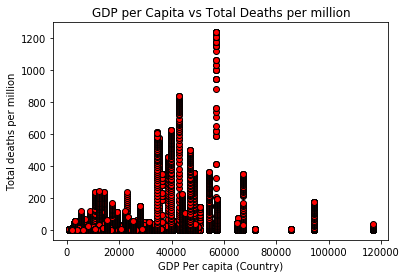

In [155]:
plt.scatter(combined_df["GDP Per Capita"],combined_df["Total Deaths Per Million"],marker="o", facecolor= 'r',edgecolor='black')
plt.title("GDP per Capita vs Total Deaths per million")
plt.xlabel("GDP Per capita (Country)")
plt.ylabel("Total deaths per million")

Text(0, 0.5, 'Deaths per million')

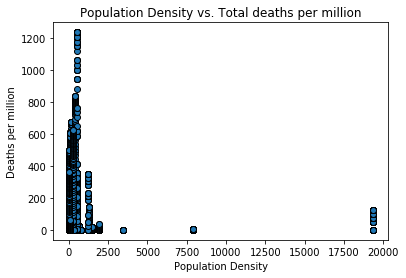

In [145]:
plt.scatter(combined_df["Population Density"],combined_df["Total Deaths Per Million"], edgecolor="black")
plt.title("Population Density vs. Total deaths per million")
plt.xlabel("Population Density")
plt.ylabel("Deaths per million")